# Balanced Case

Inputs balanceados, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito estáveis, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") equilibradas.

## Dataset

In [69]:
%run 1.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [70]:
%run 2.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.5217     0.9502       0.9641    
10       0.2017     0.9681       0.9681    
20       0.0934     0.9742       0.9746    
30       0.0647     0.9781       0.9787    
40       0.0535     0.9811       0.9819    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inputs

In [71]:
%run 3.inputs.ipynb

Edges Inputs salvo em ../datasets/edges_input.csv
Radnet Input salvo em ../datasets/radnet_input.csv


## Inference

In [72]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-49    1.4   12     0.20   1        Bom      1.00      
-67    6.7   90     0.42   0        Ruim     1.00      
-60    2.6   31     0.21   1        Bom      0.99      
-81    4.1   26     0.42   0        Ruim     0.80      
-40    3.8   5      0.30   1        Bom      1.00      
-71    4.4   31     0.14   1        Bom      0.91      
-82    8.1   73     0.66   0        Ruim     1.00      
-61    1.8   18     0.02   1        Bom      1.00      
-40    3.6   34     0.28   1        Bom      0.97      
-70    2.9   22     0.31   1        Bom      0.95      
-50    1.8   11     0.17   1        Bom      1.00      
-56    8.1   48     0.37   0        Ruim     0.99      
-62    1.4   38     0.39   1        Bom      0.92      
-54    1.9   36     0.11   1        Bom      1.00      
-56    8.5   38     0.86   0        Ruim     1.00      
-72    3.4   38     0.40   0        Ruim     0.7

## Fusion

In [73]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-49    1.4   12     0.20   0.48   0.53   0.63   1        Bom      0.71      
-67    6.7   90     0.42   0.51   0.61   0.51   0        Ruim     0.67      
-60    2.6   31     0.21   0.86   0.94   0.73   1        Bom      0.92      
-81    4.1   26     0.42   0.93   0.90   0.75   1        Bom      0.61      
-40    3.8   5      0.30   0.81   0.89   0.69   1        Bom      0.89      
-71    4.4   31     0.14   0.50   0.55   0.51   1        Bom      0.68      
-82    8.1   73     0.66   0.64   0.59   0.62   0        Ruim     0.63      
-61    1.8   18     0.02   0.68   0.63   0.48   1        Bom      0.77      
-40    3.6   34     0.28   0.64   0.62   0.67   1        Bom      0.77      
-70    2.9   22     0.31   0.60   0.68   0.49   1        Bom      0.75      
-50    1.8   11     0.17   0.54   0.54   0.56   1        Bom      0.73      
-56  

## Kalman

In [74]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-49    1.4   12     0.20   0.48   0.53   0.63   1        Bom      0.71      
-67    6.7   90     0.42   0.51   0.61   0.51   0        Ruim     0.67      
-60    2.6   31     0.21   0.86   0.94   0.73   1        Bom      0.63      
-81    4.1   26     0.42   0.93   0.90   0.75   1        Bom      0.62      
-40    3.8   5      0.30   0.81   0.89   0.69   1        Bom      0.69      
-71    4.4   31     0.14   0.50   0.55   0.51   1        Bom      0.69      
-82    8.1   73     0.66   0.64   0.59   0.62   1        Bom      0.63      
-61    1.8   18     0.02   0.68   0.63   0.48   1        Bom      0.65      
-40    3.6   34     0.28   0.64   0.62   0.67   1        Bom      0.67      
-70    2.9   22     0.31   0.60   0.68   0.49   1        Bom      0.68      
-50    1.8   11     0.17   0.54   0.54   0.56   1        Bom      0.69      


## Results

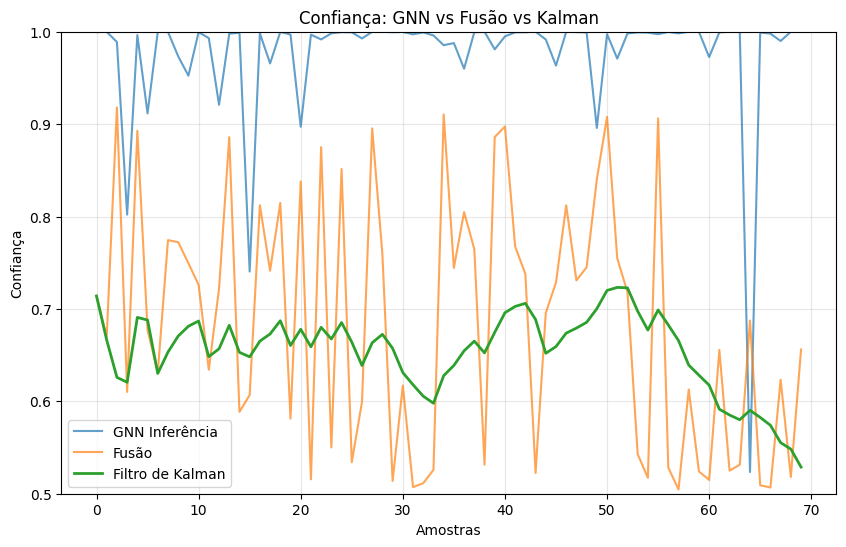

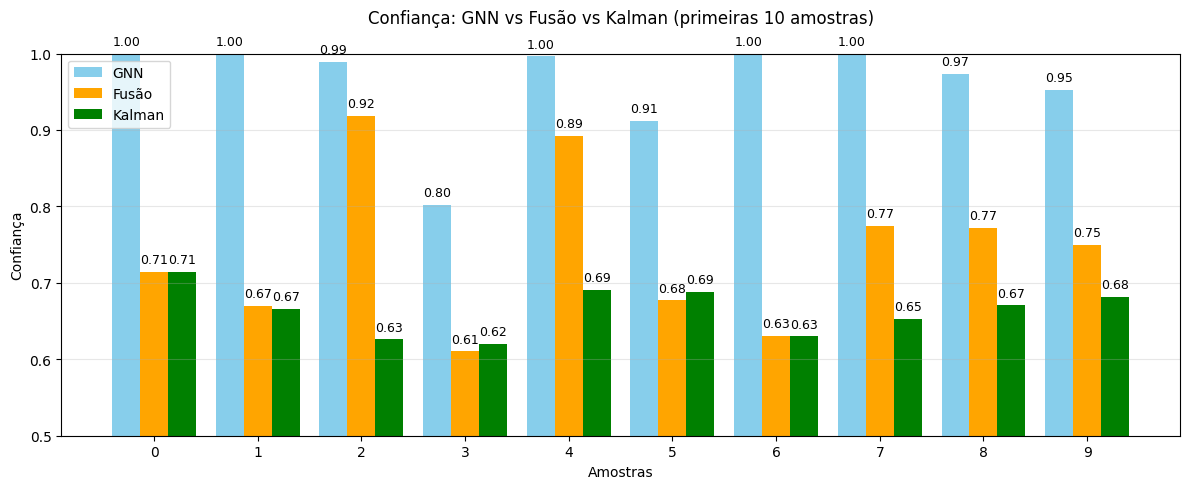

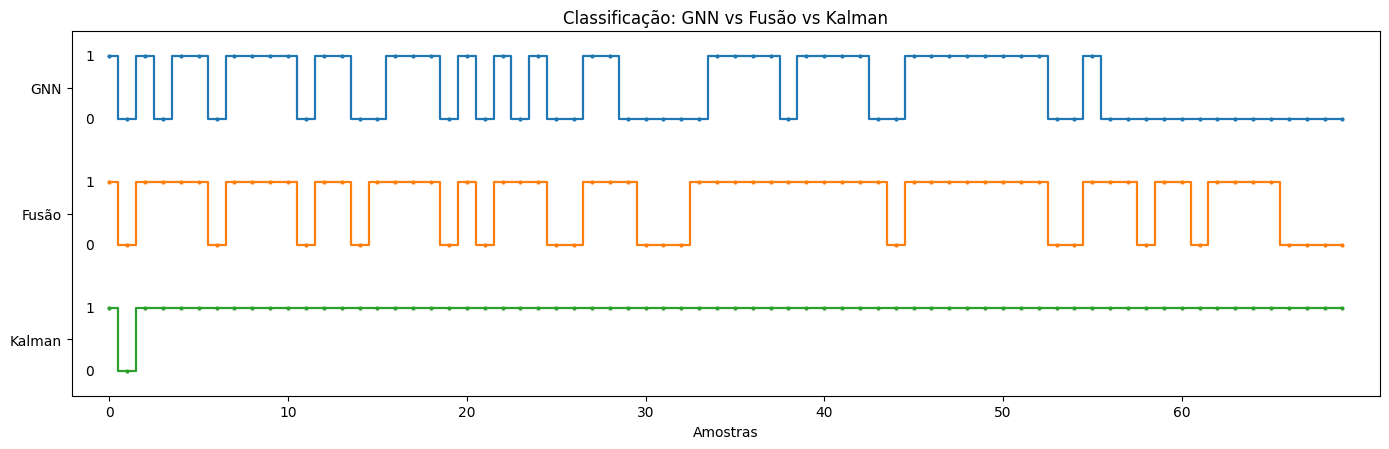

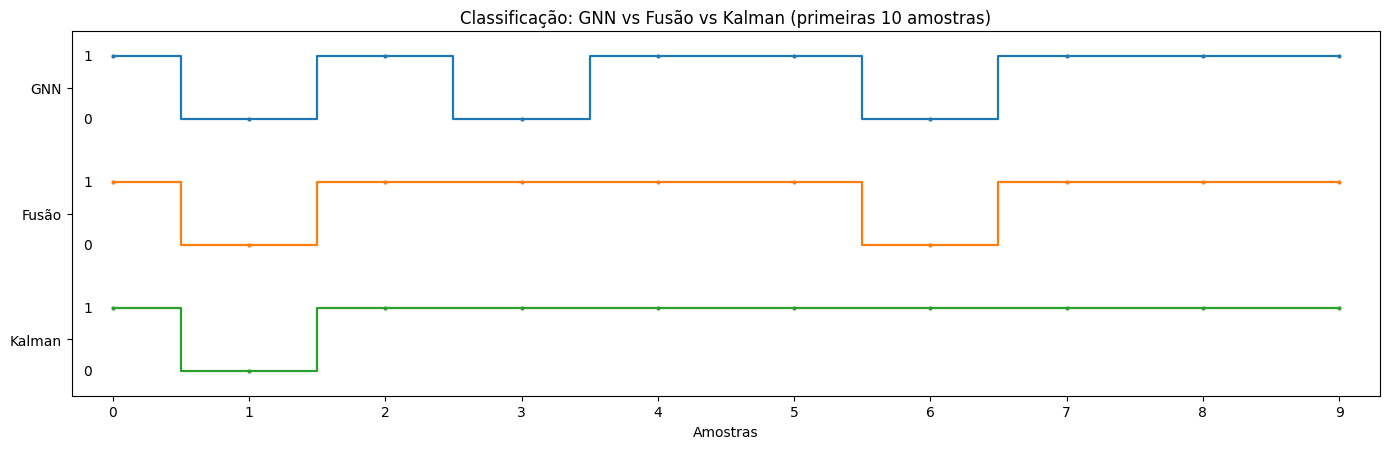

In [75]:
%run 7.results.ipynb

# Worst Case

Inputs péssimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito ruins, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") baixas.

## Dataset

In [76]:
%run 1.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [77]:
%run 2.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.6821     0.5052       0.5251    
10       0.3512     0.9113       0.9223    
20       0.1559     0.9645       0.9652    
30       0.0861     0.9747       0.9746    
40       0.0632     0.9789       0.9787    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inputs

### Imports

In [78]:
import os
import pandas as pd
import numpy as np

### Parameters

In [79]:
num_samples = 70 # quantidade de exemplos

### Worst Inputs

In [80]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [81]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [82]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [83]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Inference

In [84]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-82    9.4   49     0.68   0        Ruim     1.00      
-91    8.5   92     0.95   0        Ruim     1.00      
-93    8.1   85     0.82   0        Ruim     1.00      
-89    9.4   82     0.87   0        Ruim     1.00      
-71    8.4   75     0.91   0        Ruim     1.00      
-73    5.5   33     0.33   0        Ruim     0.85      
-84    7.6   94     0.35   0        Ruim     1.00      
-93    9.2   39     0.41   0        Ruim     1.00      
-62    7.7   58     0.99   0        Ruim     1.00      
-88    9.7   84     0.45   0        Ruim     1.00      
-85    8.4   97     0.75   0        Ruim     1.00      
-61    6.5   91     0.39   0        Ruim     0.99      
-66    9.7   93     0.71   0        Ruim     1.00      
-64    5.6   93     0.72   0        Ruim     1.00      
-82    7.4   87     0.99   0        Ruim     1.00      
-67    5.0   54     0.62   0        Ruim     1.0

## Fusion

In [85]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-82    9.4   49     0.68   0.51   0.65   0.63   0        Ruim     0.65      
-91    8.5   92     0.95   0.46   0.60   0.58   0        Ruim     0.68      
-93    8.1   85     0.82   0.54   0.54   0.47   0        Ruim     0.68      
-89    9.4   82     0.87   0.45   0.61   0.54   0        Ruim     0.68      
-71    8.4   75     0.91   0.64   0.65   0.47   0        Ruim     0.63      
-73    5.5   33     0.33   0.63   0.68   0.54   0        Ruim     0.56      
-84    7.6   94     0.35   0.58   0.53   0.62   0        Ruim     0.66      
-93    9.2   39     0.41   0.60   0.51   0.60   0        Ruim     0.66      
-62    7.7   58     0.99   0.59   0.63   0.54   0        Ruim     0.64      
-88    9.7   84     0.45   0.48   0.67   0.58   0        Ruim     0.65      
-85    8.4   97     0.75   0.47   0.59   0.59   0        Ruim     0.68      
-61  

## Kalman

In [86]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-82    9.4   49     0.68   0.51   0.65   0.63   0        Ruim     0.65      
-91    8.5   92     0.95   0.46   0.60   0.58   0        Ruim     0.68      
-93    8.1   85     0.82   0.54   0.54   0.47   0        Ruim     0.68      
-89    9.4   82     0.87   0.45   0.61   0.54   0        Ruim     0.68      
-71    8.4   75     0.91   0.64   0.65   0.47   0        Ruim     0.67      
-73    5.5   33     0.33   0.63   0.68   0.54   0        Ruim     0.64      
-84    7.6   94     0.35   0.58   0.53   0.62   0        Ruim     0.65      
-93    9.2   39     0.41   0.60   0.51   0.60   0        Ruim     0.65      
-62    7.7   58     0.99   0.59   0.63   0.54   0        Ruim     0.65      
-88    9.7   84     0.45   0.48   0.67   0.58   0        Ruim     0.65      
-85    8.4   97     0.75   0.47   0.59   0.59   0        Ruim     0.65      


## Results

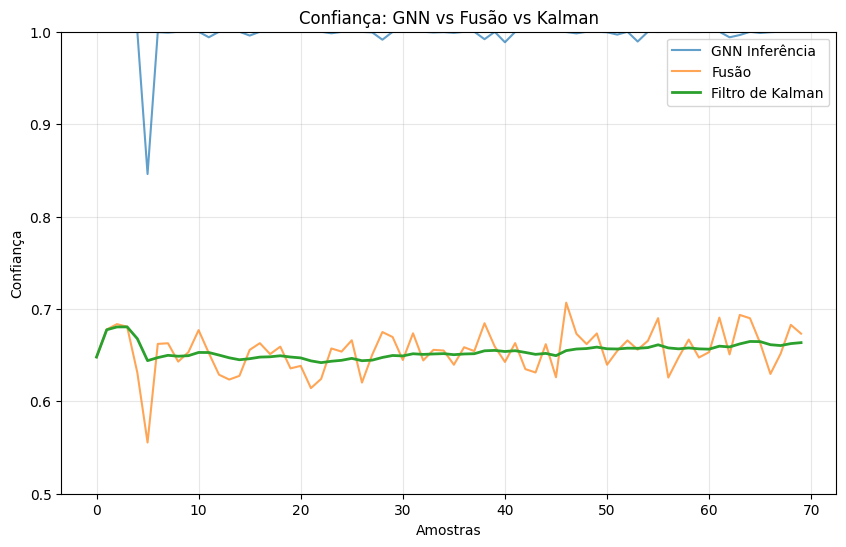

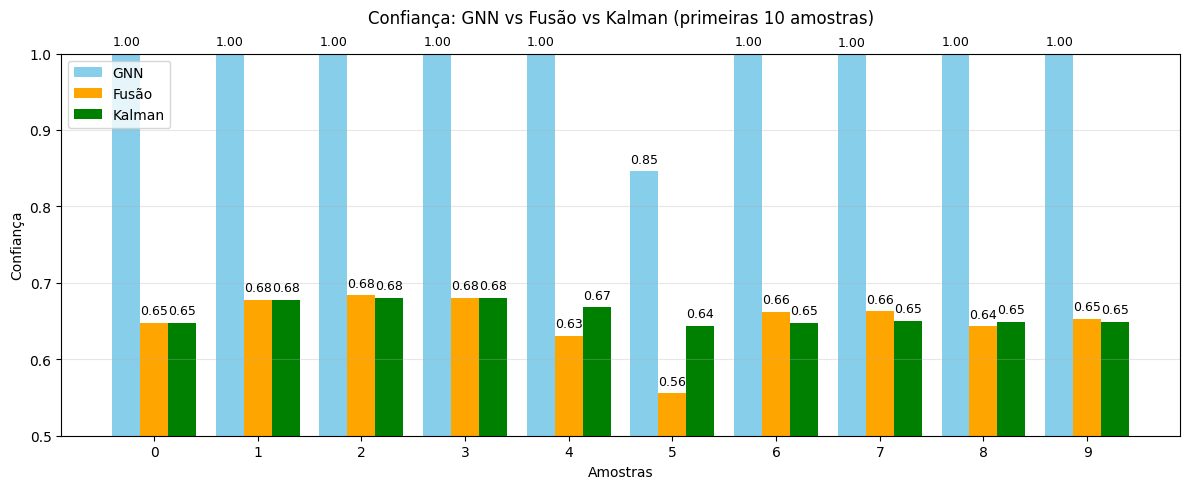

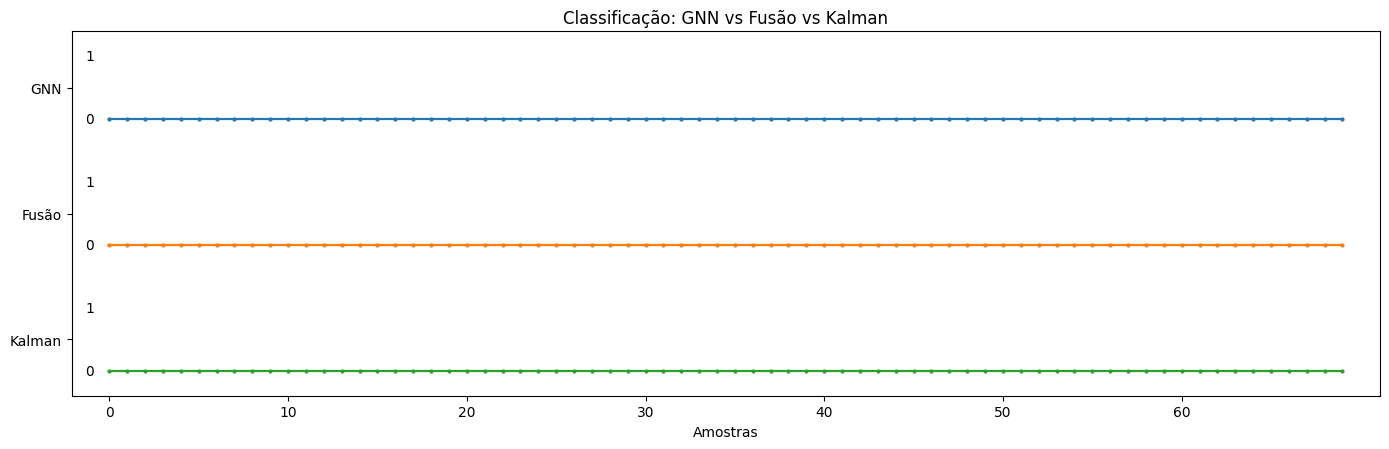

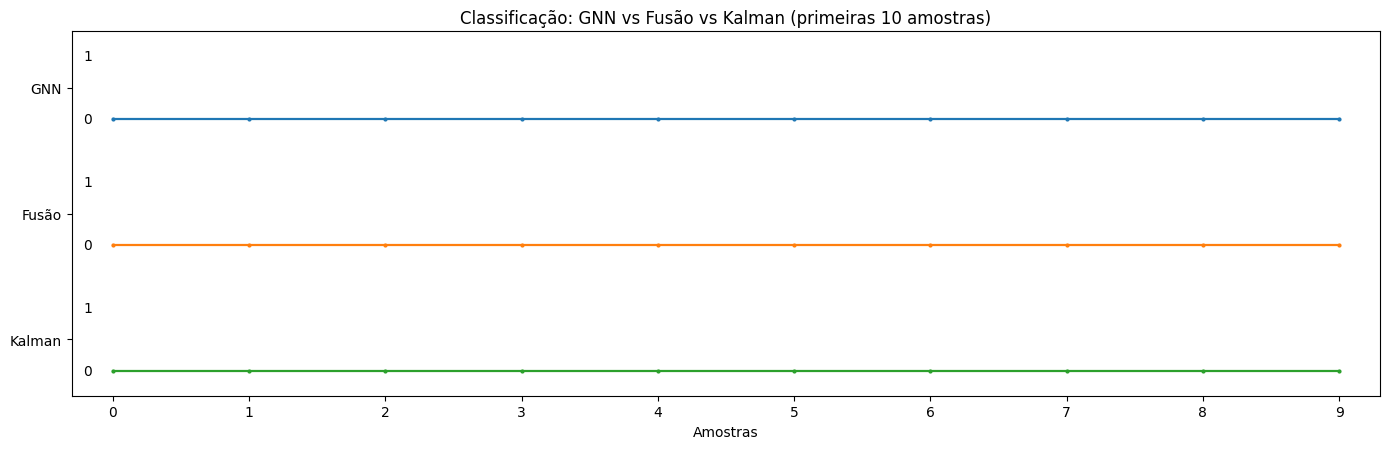

In [87]:
%run 7.results.ipynb

# Best Case

Inputs ótimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") quase perfeitas, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") altas.

## Dataset

In [88]:
%run 1.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [89]:
%run 2.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.8049     0.2510       0.3583    
10       0.3532     0.9526       0.9562    
20       0.1347     0.9711       0.9723    
30       0.0761     0.9761       0.9763    
40       0.0595     0.9790       0.9794    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inputs

### Imports

In [90]:
import os
import pandas as pd
import numpy as np

### Parameters

In [91]:
num_samples = 70 # quantidade de exemplos

### Best Inputs

In [92]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [93]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [94]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [95]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Inference

In [96]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-32    2.3   2      0.37   1        Bom      1.00      
-42    1.4   39     0.29   1        Bom      1.00      
-37    2.4   24     0.09   1        Bom      1.00      
-31    3.6   33     0.19   1        Bom      1.00      
-54    3.6   39     0.19   1        Bom      0.97      
-34    1.4   20     0.16   1        Bom      1.00      
-59    2.0   8      0.16   1        Bom      1.00      
-53    3.3   6      0.39   1        Bom      0.99      
-60    2.1   15     0.38   1        Bom      0.99      
-35    2.8   15     0.06   1        Bom      1.00      
-61    2.2   23     0.33   1        Bom      0.99      
-44    1.9   21     0.00   1        Bom      1.00      
-34    1.9   10     0.02   1        Bom      1.00      
-38    3.4   28     0.13   1        Bom      1.00      
-30    4.0   6      0.33   1        Bom      1.00      
-50    3.5   40     0.16   1        Bom      0.9

## Fusion

In [97]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-32    2.3   2      0.37   0.82   0.81   0.76   1        Bom      0.88      
-42    1.4   39     0.29   0.92   0.88   0.86   1        Bom      0.94      
-37    2.4   24     0.09   0.92   0.88   0.81   1        Bom      0.93      
-31    3.6   33     0.19   0.79   0.87   0.89   1        Bom      0.90      
-54    3.6   39     0.19   0.93   0.94   0.80   1        Bom      0.93      
-34    1.4   20     0.16   0.82   0.92   0.83   1        Bom      0.92      
-59    2.0   8      0.16   0.85   0.94   0.84   1        Bom      0.93      
-53    3.3   6      0.39   0.89   0.95   0.70   1        Bom      0.92      
-60    2.1   15     0.38   0.93   0.81   0.82   1        Bom      0.91      
-35    2.8   15     0.06   0.89   0.95   0.74   1        Bom      0.93      
-61    2.2   23     0.33   0.94   0.94   0.76   1        Bom      0.94      
-44  

## Kalman

In [98]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-32    2.3   2      0.37   0.82   0.81   0.76   1        Bom      0.88      
-42    1.4   39     0.29   0.92   0.88   0.86   1        Bom      0.94      
-37    2.4   24     0.09   0.92   0.88   0.81   1        Bom      0.93      
-31    3.6   33     0.19   0.79   0.87   0.89   1        Bom      0.92      
-54    3.6   39     0.19   0.93   0.94   0.80   1        Bom      0.93      
-34    1.4   20     0.16   0.82   0.92   0.83   1        Bom      0.92      
-59    2.0   8      0.16   0.85   0.94   0.84   1        Bom      0.93      
-53    3.3   6      0.39   0.89   0.95   0.70   1        Bom      0.93      
-60    2.1   15     0.38   0.93   0.81   0.82   1        Bom      0.92      
-35    2.8   15     0.06   0.89   0.95   0.74   1        Bom      0.92      
-61    2.2   23     0.33   0.94   0.94   0.76   1        Bom      0.93      


## Resuts

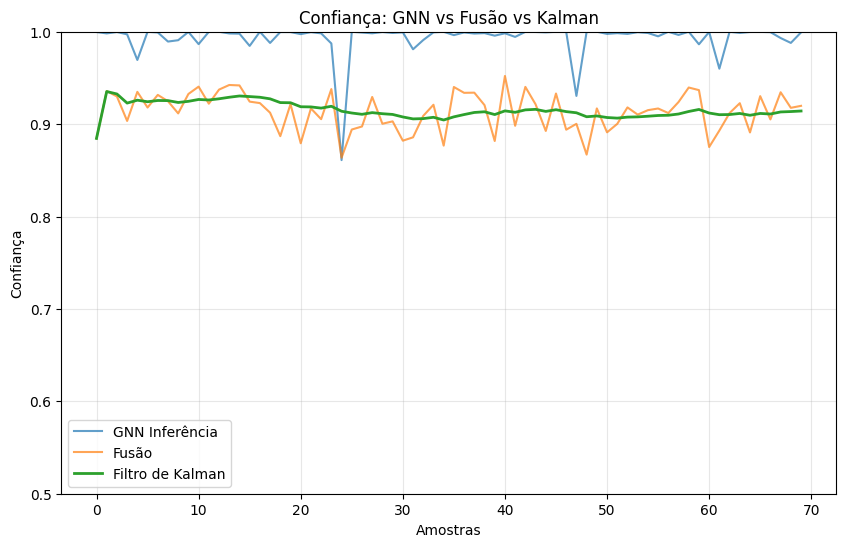

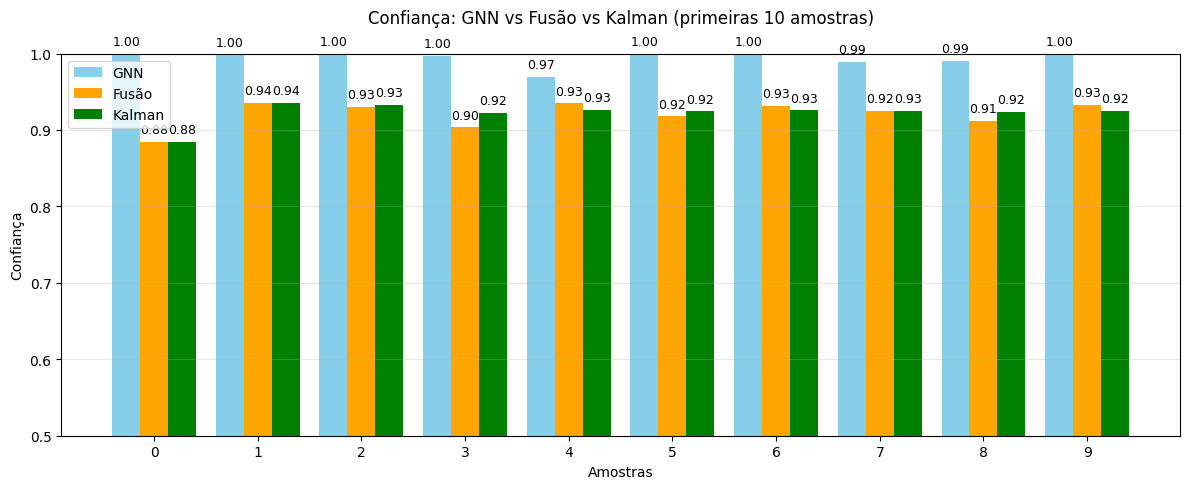

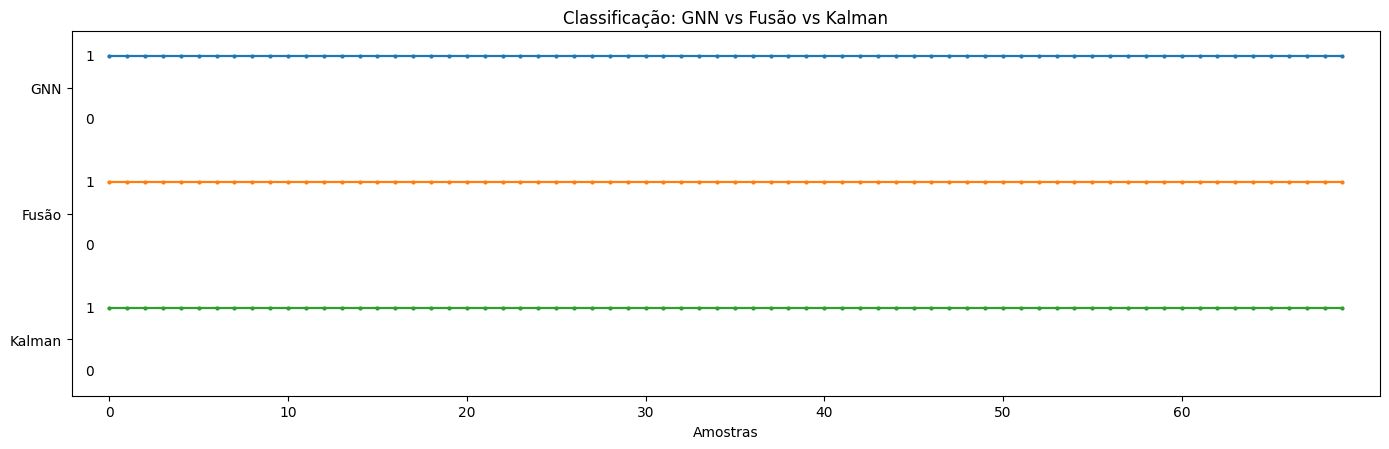

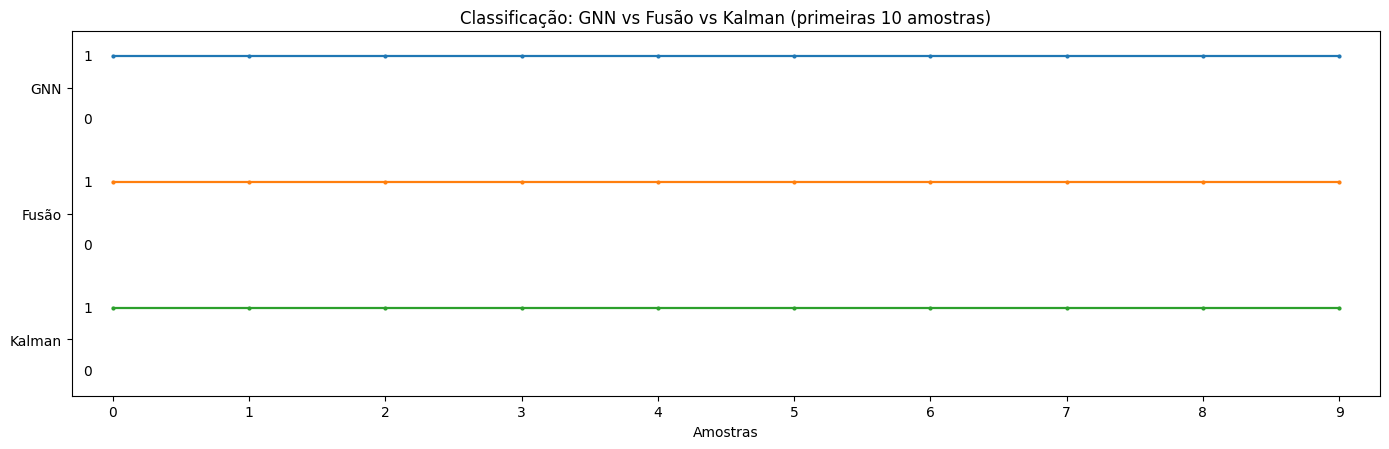

In [99]:
%run 7.results.ipynb

# Good Metrics and Bad RADNET

Métricas da rede ("rssi", "etx", "delay", "busy_fraction") boas, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") ruins.

## Dataset

In [100]:
%run 1.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [101]:
%run 2.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.6774     0.5484       0.6281    
10       0.3371     0.9603       0.9609    
20       0.1572     0.9696       0.9686    
30       0.0917     0.9736       0.9726    
40       0.0696     0.9762       0.9757    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inputs

### Imports

In [102]:
import os
import pandas as pd
import numpy as np

### Parameters

In [103]:
num_samples = 70 # quantidade de exemplos

### Good Metrics and Bad RADNET

In [104]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [105]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [106]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [107]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Inference

In [108]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-58    1.1   2      0.08   1        Bom      1.00      
-34    1.1   7      0.40   1        Bom      1.00      
-55    3.9   10     0.16   1        Bom      0.99      
-39    3.9   5      0.28   1        Bom      0.99      
-31    1.2   4      0.14   1        Bom      1.00      
-42    1.4   3      0.02   1        Bom      1.00      
-38    1.0   19     0.33   1        Bom      1.00      
-58    1.9   25     0.02   1        Bom      1.00      
-31    1.6   38     0.40   1        Bom      0.99      
-50    1.6   32     0.27   1        Bom      0.99      
-44    2.2   6      0.02   1        Bom      1.00      
-33    1.9   26     0.38   1        Bom      0.99      
-57    1.1   11     0.08   1        Bom      1.00      
-32    1.2   5      0.24   1        Bom      1.00      
-42    3.3   26     0.25   1        Bom      0.99      
-40    2.5   9      0.07   1        Bom      1.0

## Fusion

In [109]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-58    1.1   2      0.08   0.51   0.58   0.61   1        Bom      0.73      
-34    1.1   7      0.40   0.48   0.55   0.50   1        Bom      0.71      
-55    3.9   10     0.16   0.61   0.68   0.60   1        Bom      0.78      
-39    3.9   5      0.28   0.59   0.51   0.56   1        Bom      0.73      
-31    1.2   4      0.14   0.56   0.54   0.47   1        Bom      0.72      
-42    1.4   3      0.02   0.46   0.51   0.59   1        Bom      0.70      
-38    1.0   19     0.33   0.48   0.59   0.46   1        Bom      0.71      
-58    1.9   25     0.02   0.59   0.69   0.48   1        Bom      0.77      
-31    1.6   38     0.40   0.46   0.68   0.58   1        Bom      0.74      
-50    1.6   32     0.27   0.60   0.52   0.57   1        Bom      0.73      
-44    2.2   6      0.02   0.58   0.59   0.46   1        Bom      0.74      
-33  

## Kalman

In [110]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-58    1.1   2      0.08   0.51   0.58   0.61   1        Bom      0.73      
-34    1.1   7      0.40   0.48   0.55   0.50   1        Bom      0.71      
-55    3.9   10     0.16   0.61   0.68   0.60   1        Bom      0.74      
-39    3.9   5      0.28   0.59   0.51   0.56   1        Bom      0.74      
-31    1.2   4      0.14   0.56   0.54   0.47   1        Bom      0.73      
-42    1.4   3      0.02   0.46   0.51   0.59   1        Bom      0.73      
-38    1.0   19     0.33   0.48   0.59   0.46   1        Bom      0.72      
-58    1.9   25     0.02   0.59   0.69   0.48   1        Bom      0.73      
-31    1.6   38     0.40   0.46   0.68   0.58   1        Bom      0.73      
-50    1.6   32     0.27   0.60   0.52   0.57   1        Bom      0.73      
-44    2.2   6      0.02   0.58   0.59   0.46   1        Bom      0.73      


## Results

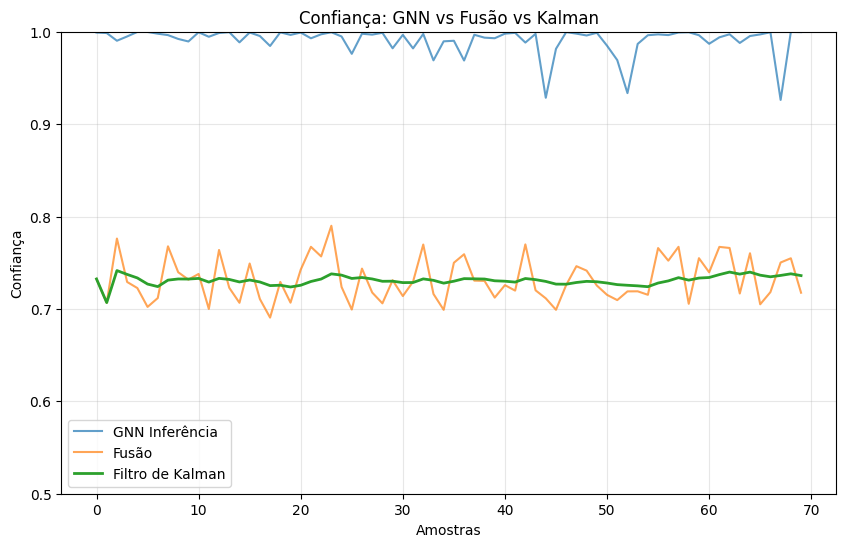

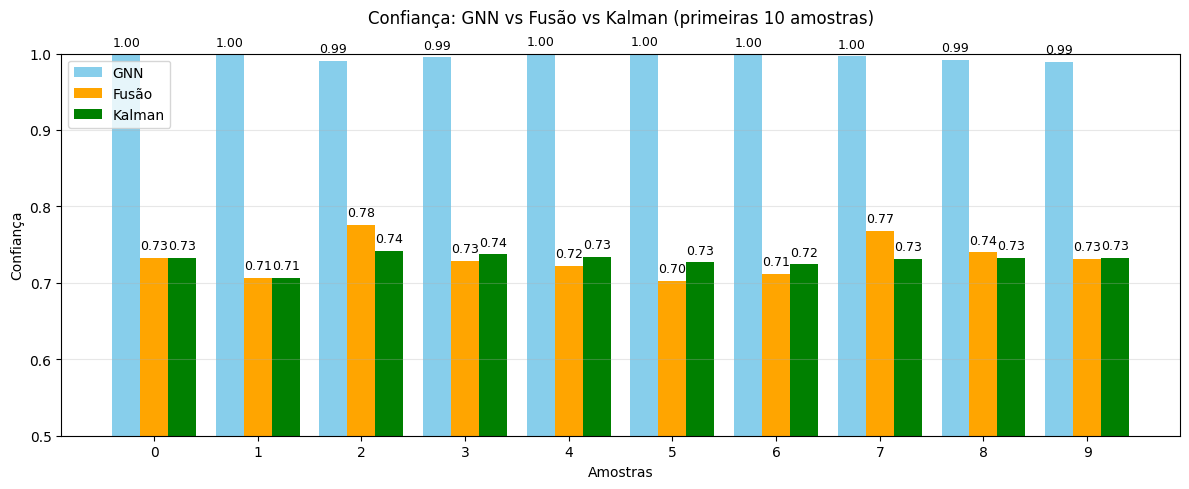

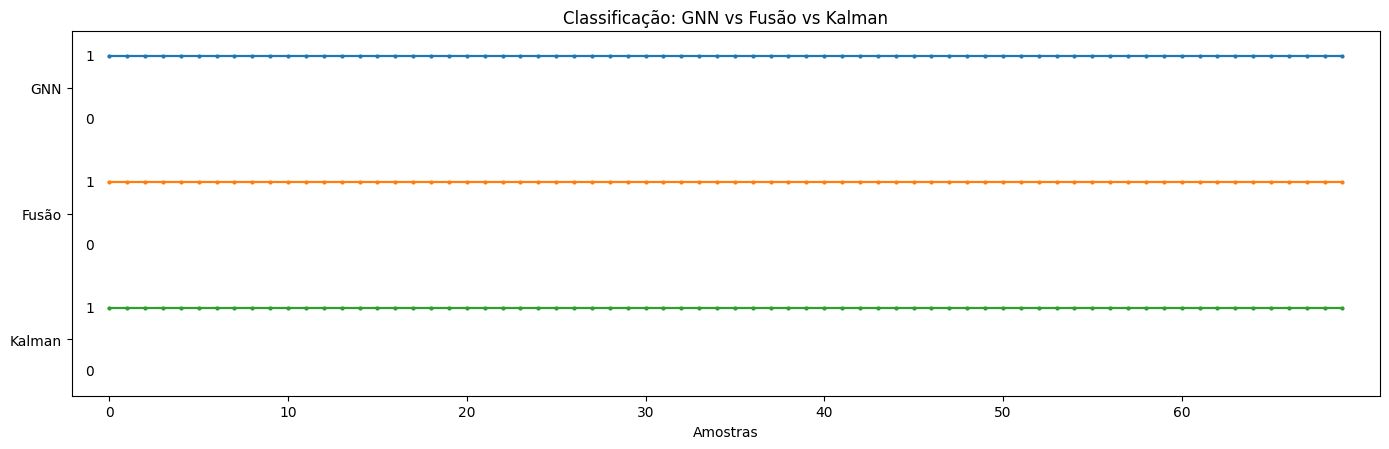

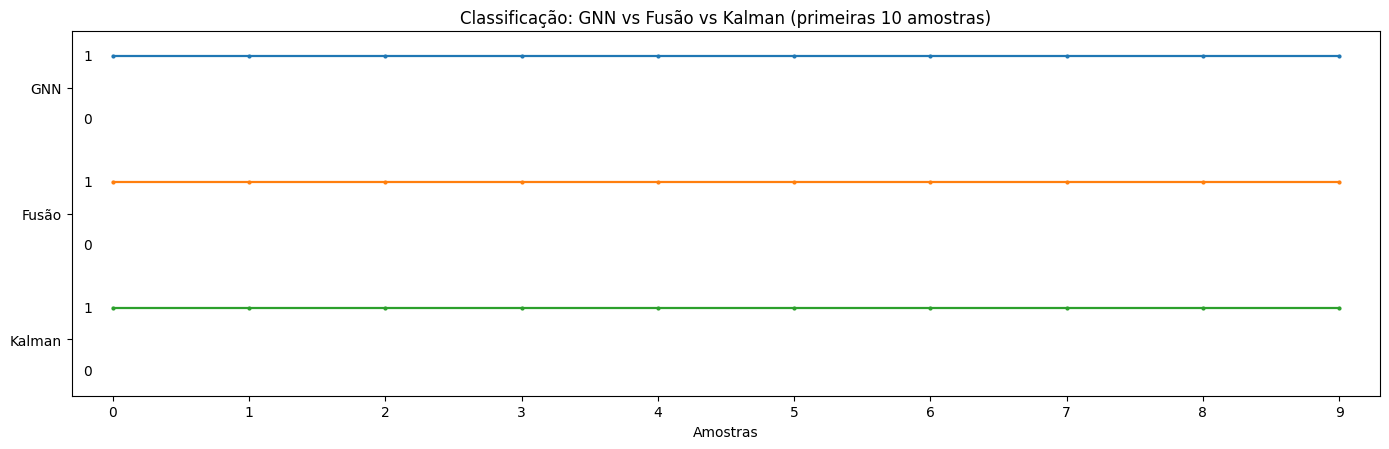

In [111]:
%run 7.results.ipynb

# Bad Metrics and Good RADNET

Métricas da rede ("rssi", "etx", "delay", "busy_fraction") ruins, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") boas.

## Dataset

In [112]:
%run 1.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [113]:
%run 2.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.8728     0.5000       0.5000    
10       0.3763     0.9434       0.9486    
20       0.1699     0.9620       0.9637    
30       0.1015     0.9681       0.9697    
40       0.0782     0.9723       0.9741    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Imputs

### Impots

In [114]:
import os
import pandas as pd
import numpy as np

### Parameters

In [115]:
num_samples = 70 # quantidade de exemplos

### Bad Metrics and Good RADNET

In [116]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [117]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [118]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [119]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Inference

In [120]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-72    9.7   45     0.52   0        Ruim     1.00      
-90    4.9   84     0.78   0        Ruim     1.00      
-73    9.8   98     0.97   0        Ruim     1.00      
-88    7.4   37     0.48   0        Ruim     1.00      
-94    9.7   96     0.73   0        Ruim     1.00      
-64    8.1   80     0.90   0        Ruim     1.00      
-77    8.8   93     0.64   0        Ruim     1.00      
-64    7.1   98     0.98   0        Ruim     1.00      
-65    9.8   98     0.58   0        Ruim     1.00      
-71    8.1   83     0.65   0        Ruim     1.00      
-85    8.8   74     0.68   0        Ruim     1.00      
-64    8.0   72     0.87   0        Ruim     1.00      
-94    7.1   57     0.81   0        Ruim     1.00      
-72    6.8   62     0.35   0        Ruim     0.99      
-80    8.7   88     0.63   0        Ruim     1.00      
-74    9.3   87     1.00   0        Ruim     1.0

## Fusion

In [121]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-72    9.7   45     0.52   0.75   0.94   0.76   0        Ruim     0.50      
-90    4.9   84     0.78   0.88   0.91   0.80   1        Bom      0.53      
-73    9.8   98     0.97   0.84   0.83   0.78   0        Ruim     0.50      
-88    7.4   37     0.48   0.89   0.82   0.88   1        Bom      0.52      
-94    9.7   96     0.73   0.85   0.92   0.74   1        Bom      0.52      
-64    8.1   80     0.90   0.90   0.91   0.80   1        Bom      0.53      
-77    8.8   93     0.64   0.89   0.83   0.86   1        Bom      0.52      
-64    7.1   98     0.98   0.86   0.90   0.88   1        Bom      0.53      
-65    9.8   98     0.58   0.91   0.84   0.88   1        Bom      0.53      
-71    8.1   83     0.65   0.87   0.87   0.87   1        Bom      0.52      
-85    8.8   74     0.68   0.81   0.91   0.75   1        Bom      0.50      
-64  

## Kalman

In [122]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-72    9.7   45     0.52   0.75   0.94   0.76   0        Ruim     0.50      
-90    4.9   84     0.78   0.88   0.91   0.80   1        Bom      0.53      
-73    9.8   98     0.97   0.84   0.83   0.78   1        Bom      0.51      
-88    7.4   37     0.48   0.89   0.82   0.88   1        Bom      0.51      
-94    9.7   96     0.73   0.85   0.92   0.74   1        Bom      0.51      
-64    8.1   80     0.90   0.90   0.91   0.80   1        Bom      0.52      
-77    8.8   93     0.64   0.89   0.83   0.86   1        Bom      0.52      
-64    7.1   98     0.98   0.86   0.90   0.88   1        Bom      0.52      
-65    9.8   98     0.58   0.91   0.84   0.88   1        Bom      0.52      
-71    8.1   83     0.65   0.87   0.87   0.87   1        Bom      0.52      
-85    8.8   74     0.68   0.81   0.91   0.75   1        Bom      0.52      


## Results

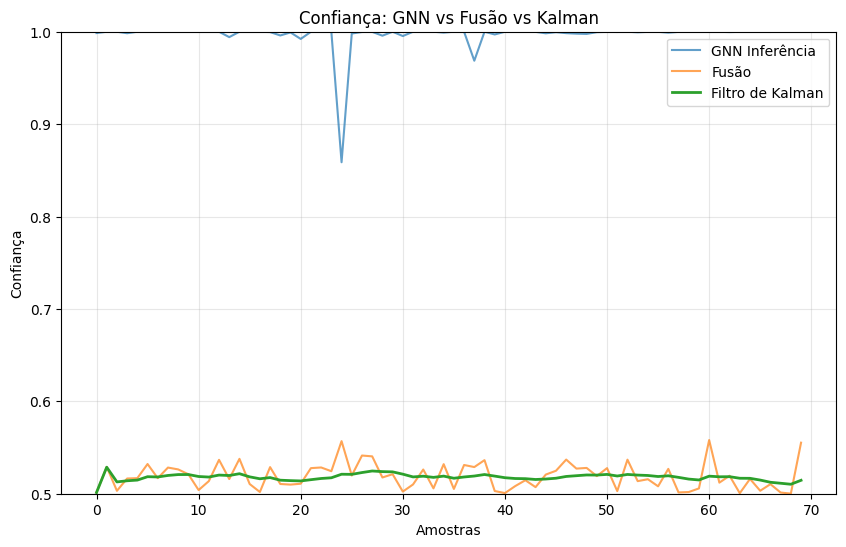

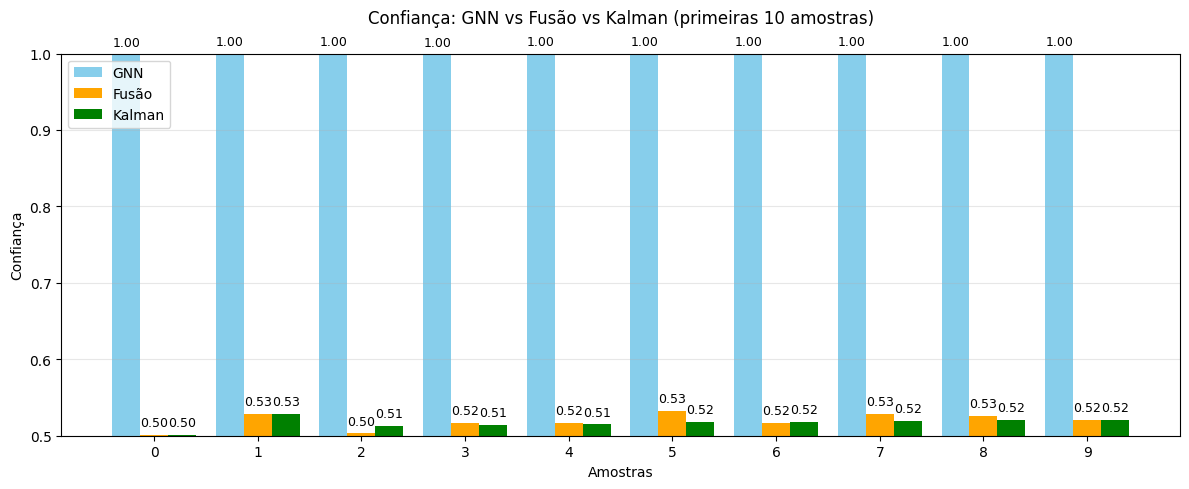

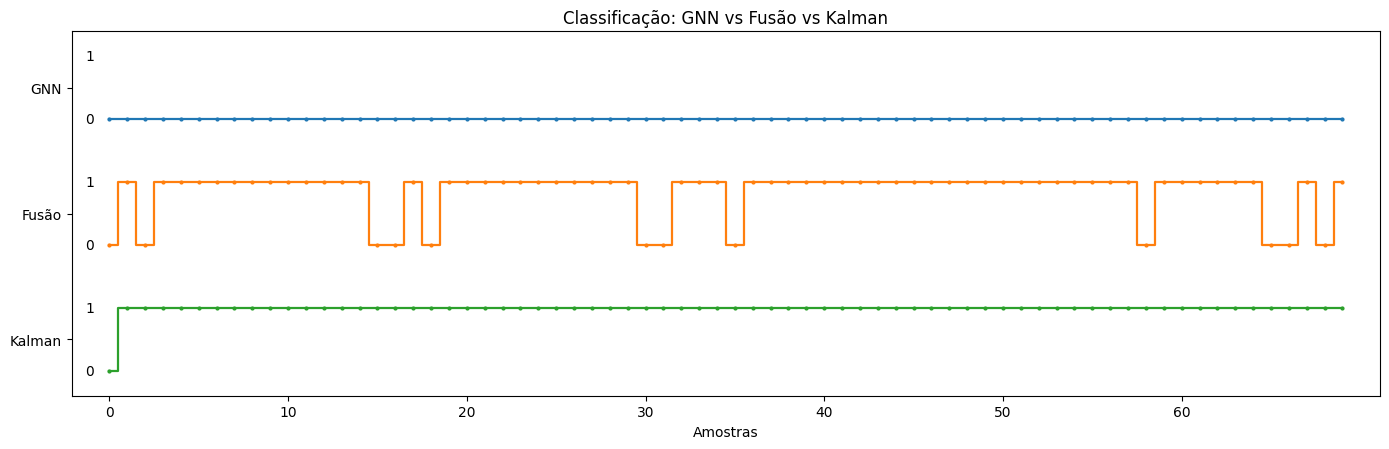

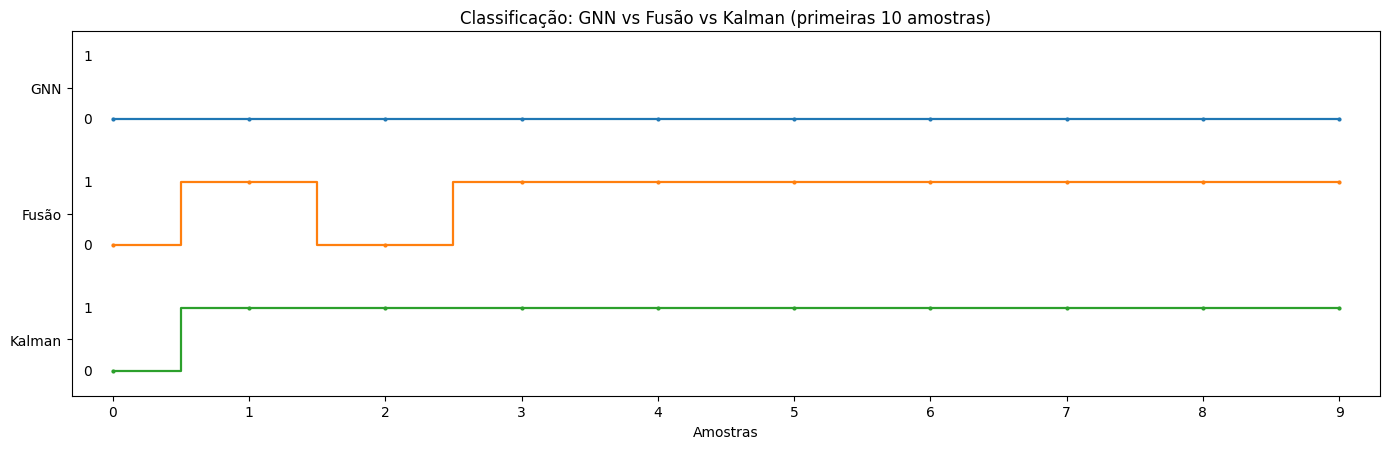

In [123]:
%run 7.results.ipynb